In [1]:
from datetime import datetime
import tributary.lazy as tl

In [5]:
class Time(tl.LazyGraph):
    @tl.node()
    def time(self):
        return self.override | self.now()
    
    @tl.node(memoize=False)
    def now(self):
        n = datetime.now()
        if self.granularity is None:
            return n
        if self.granularity == 's':
            m = 1.0
        elif self.granularity == 'm':
            m = 60.0
        elif self.granularity == 'h':
            m = 3600.0
        else:
            raise Exception("Granularity not in (s, m ,h): {}".format(self.granularity))
        return datetime.fromtimestamp(n.timestamp() - (n.timestamp() % m))

    def reset(self):
        self.override = None

    def __init__(self, granularity='m'):
        self.override = self.node(name="override", value=None)
        self.granularity = granularity

In [6]:
T = Time()

In [29]:
print(T.now()())
print(T.time()())

2020-10-14 22:32:00
2020-10-14 22:32:00


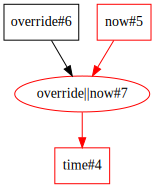

In [24]:
T.time().graphviz()

In [25]:
T.override = 5

In [28]:
T.override()

In [27]:
T.reset()